In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import datetime
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd 
import json
import ast

In [92]:
PATH = "the-movies-dataset/"
df_movie = pd.read_csv(PATH + 'movies_metadata.csv')
df_credits = pd.read_csv(PATH + "credits.csv")
print("credits: \n ", df_credits.columns)
df_keywords = pd.read_csv(PATH+"keywords.csv")
print("\n keywords: \n", df_keywords.columns)
df_links = pd.read_csv(PATH+"links.csv")
print("\n links: \n", df_links.columns)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


credits: 
  Index(['cast', 'crew', 'id'], dtype='object')

 keywords: 
 Index(['id', 'keywords'], dtype='object')

 links: 
 Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')


In [93]:
df_movie.shape

(45466, 24)

In [94]:
df_movie[["id","imdb_id"]].dtypes

id         object
imdb_id    object
dtype: object

In [95]:
df_movie.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [96]:
#changing id to numeric type

df_movie["id"] =pd.to_numeric(df_movie['id'], errors='coerce',downcast="integer")
df_movie.dropna(subset=["id"],inplace=True)
df_movie.shape

(45463, 24)

In [97]:
df_movie.dropna(subset=["imdb_id"]).shape

(45446, 24)

In [98]:
print("df_credits",df_credits.shape)

df_credits (45476, 3)


In [99]:
df_credits.head(5)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [100]:
#merge movie and credits dataset
df = df_movie.merge(df_credits,on=["id"],how="left")

In [101]:
df.head(5)
df.shape

(45539, 26)

In [102]:
#merging wih keywords dataset
df = df.merge(df_keywords,on=["id"],how="left")
df.shape

(46629, 27)

In [103]:
df.drop_duplicates().shape
df.shape

(46629, 27)

In [104]:
df.isnull().sum()

adult                        0
belongs_to_collection    42055
budget                       0
genres                       0
homepage                 38620
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   995
popularity                   4
poster_path                399
production_companies         4
production_countries         4
release_date                88
revenue                      4
runtime                    268
spoken_languages             4
status                      86
tagline                  25846
title                        4
video                        4
vote_average                 4
vote_count                   4
cast                         1
crew                         1
keywords                     1
dtype: int64

In [107]:
#dropping empty cast, crew, keywords
df.dropna(subset=["cast","crew","keywords","popularity"],inplace=True)
print(df.shape)

(46624, 27)


In [108]:
df.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


In [109]:
#cleaning cast column
df['cast'] = df['cast'].apply(ast.literal_eval)

In [110]:
dft = df.copy()

In [111]:
dft['cast'][0]

[{'cast_id': 14,
  'character': 'Woody (voice)',
  'credit_id': '52fe4284c3a36847f8024f95',
  'gender': 2,
  'id': 31,
  'name': 'Tom Hanks',
  'order': 0,
  'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'},
 {'cast_id': 15,
  'character': 'Buzz Lightyear (voice)',
  'credit_id': '52fe4284c3a36847f8024f99',
  'gender': 2,
  'id': 12898,
  'name': 'Tim Allen',
  'order': 1,
  'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'},
 {'cast_id': 16,
  'character': 'Mr. Potato Head (voice)',
  'credit_id': '52fe4284c3a36847f8024f9d',
  'gender': 2,
  'id': 7167,
  'name': 'Don Rickles',
  'order': 2,
  'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'},
 {'cast_id': 17,
  'character': 'Slinky Dog (voice)',
  'credit_id': '52fe4284c3a36847f8024fa1',
  'gender': 2,
  'id': 12899,
  'name': 'Jim Varney',
  'order': 3,
  'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'},
 {'cast_id': 18,
  'character': 'Rex (voice)',
  'credit_id': '52fe4284c3a36847f8024fa5',
  'gender': 2,
  'id': 12900,
 

In [115]:
dft['cast'] = dft['cast'].apply(lambda r: [x['name'] for x in r])

In [118]:
dft['cast'] = dft['cast'].apply(lambda r: r[:5])

In [120]:
dft['cast'][0]
df = dft

In [121]:
df['cast'][0]

['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim Varney', 'Wallace Shawn']

In [16]:
data[data['budget'].notnull()][['title', 'budget', 'revenue', 'year']].sort_values('budget', ascending=False).head(10)

,title,budget,revenue,year
17124,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,2011
11827,Pirates of the Caribbean: At World's End,300000000.0,9.610000e+08,2007
26558,Avengers: Age of Ultron,280000000.0,1.405404e+09,2015
11067,Superman Returns,270000000.0,3.910812e+08,2006
44842,Transformers: The Last Knight,260000000.0,6.049421e+08,2017
16130,Tangled,260000000.0,5.917949e+08,2010
18685,John Carter,260000000.0,2.841391e+08,2012
11780,Spider-Man 3,258000000.0,8.908716e+08,2007
21175,The Lone Ranger,255000000.0,8.928991e+07,2013
22059,The Hobbit: The Desolation of Smaug,250000000.0,9.584000e+08,2013


In [17]:
data[data['revenue'].notnull()][['title', 'budget', 'revenue', 'year']].sort_values('revenue', ascending=False).head(10)

,title,budget,revenue,year
14551,Avatar,237000000.0,2.787965e+09,2009
26555,Star Wars: The Force Awakens,245000000.0,2.068224e+09,2015
1639,Titanic,200000000.0,1.845034e+09,1997
17818,The Avengers,220000000.0,1.519558e+09,2012
25084,Jurassic World,150000000.0,1.513529e+09,2015
28830,Furious 7,190000000.0,1.506249e+09,2015
26558,Avengers: Age of Ultron,280000000.0,1.405404e+09,2015
17437,Harry Potter and the Deathly Hallows: Part 2,125000000.0,1.342000e+09,2011
22110,Frozen,150000000.0,1.274219e+09,2013
42222,Beauty and the Beast,160000000.0,1.262886e+09,2017


In [14]:
data = df_movie
data['popularity'] = pd.to_numeric(data['popularity'], errors='coerce')
data['popularity'] = data['popularity'].replace(0, np.nan)

data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
data['budget'] = data['budget'].replace(0, np.nan)

data['revenue'] = data['revenue'].replace(0, np.nan)

#Extracting Only year in release_date to make it simpler
data['year'] = pd.to_datetime(data['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

data['runtime'] = data['runtime'].astype('float')
data['vote_average'] = data['vote_average'].astype('float')
data['vote_count'] = data['vote_count'].astype('float')

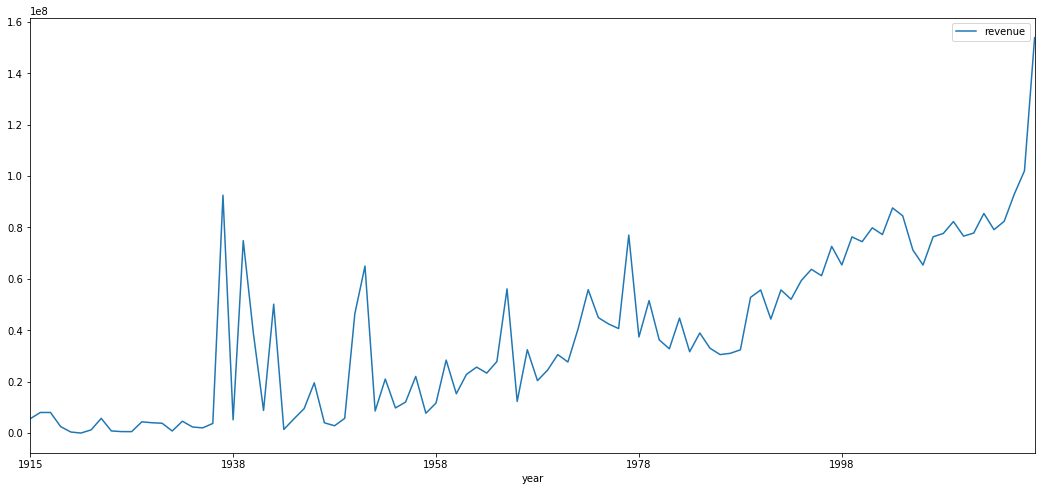

In [40]:
year_rev = (data[data['revenue'].notnull()][['year','revenue']].groupby('year').mean())[:-1]
year_rev.plot(figsize=(18,8))
plt.show()

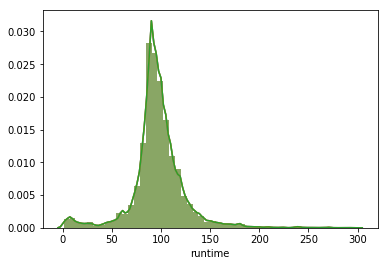

In [25]:
sns.distplot(data[(data['runtime'] < 300) & (data['runtime'] > 0)]['runtime'])
plt.show()